In [11]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [43]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

mnist = fetch_openml('mnist_784')


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [44]:
mnist

{'data':        pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
 0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 ...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 69995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 69999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
 
      

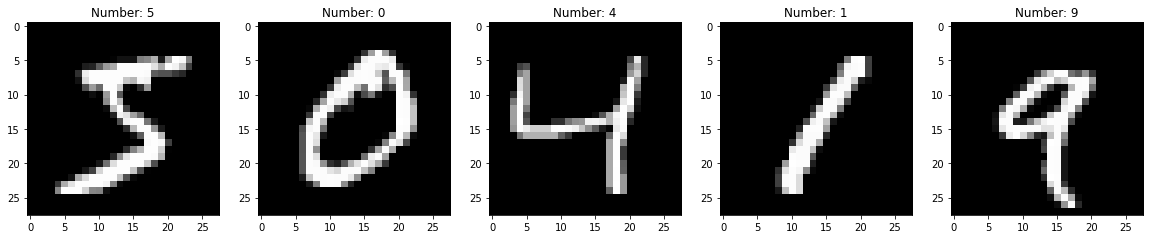

In [52]:
plt.figure(figsize = (20,4))
for index, (image, label) in enumerate(zip(mnist.data.values[:5], mnist.target.values[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image,(28,28)), cmap = "gray")
    plt.title("Number: %s" % label)

In [54]:
X_train, X_test, y_train, y_test, = train_test_split(mnist.data, mnist.target, test_size = 0.2)

In [56]:
mdl = LogisticRegression(solver = 'lbfgs')
mdl.fit(X_train, y_train)
predictions = mdl.predict(X_test)
score = mdl.score(X_test, y_test)
print(score)

0.9220714285714285


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
mdl.predict([X_test.iloc[0]])[0]

C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


'2'

Prediction: 2


C:\Users\vaibh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


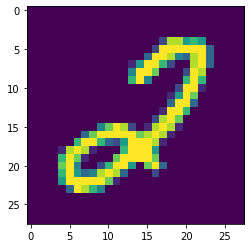

In [96]:
index = 0
plt.imshow(np.reshape(X_test.iloc[index], (28,28)))
print("Prediction: " + mdl.predict([X_test.iloc[index]])[0])

In [97]:
cm = metrics.confusion_matrix(y_test, predictions)
cm

array([[1354,    0,    2,    5,    3,   12,    9,    1,    5,    1],
       [   0, 1510,    7,    6,    1,    6,    0,    6,   20,    2],
       [   6,   10, 1301,   21,   22,    8,   22,   16,   37,    7],
       [   4,    6,   28, 1224,    0,   37,    6,   11,   33,   10],
       [   5,    8,    7,    2, 1307,    0,   10,    2,   12,   43],
       [  16,    5,    7,   51,   17, 1079,   30,    2,   46,   11],
       [   8,    7,   12,    1,   15,    9, 1315,    1,   10,    0],
       [   5,    7,   19,    5,    9,    2,    2, 1325,    6,   47],
       [  11,   25,   19,   27,    7,   30,    7,    4, 1222,    8],
       [   6,    8,    2,   26,   39,    7,    0,   41,   15, 1272]],
      dtype=int64)

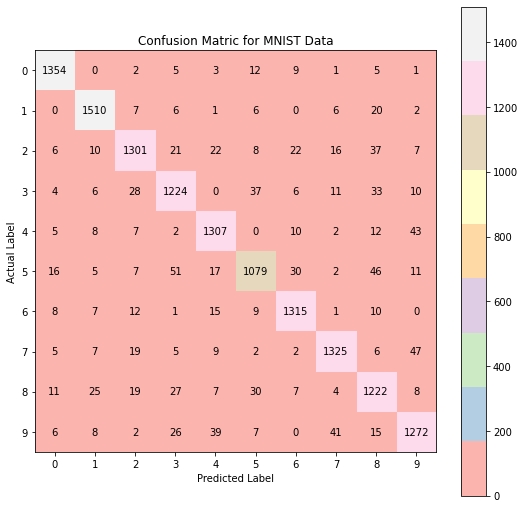

In [107]:
plt.figure(figsize=(9,9))
plt.imshow(cm, cmap = "Pastel1")
plt.title("Confusion Matric for MNIST Data")

plt.xticks(np.arange(10))
plt.yticks(np.arange(10))

plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")
plt.colorbar()
width, height = cm.shape

for x in range(width):
    for y in range(height):
        plt.annotate(str(cm[x][y]), xy = (y,x), horizontalalignment = 'center', verticalalignment = 'center')